<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw12_SkipNgram_DeepNN_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

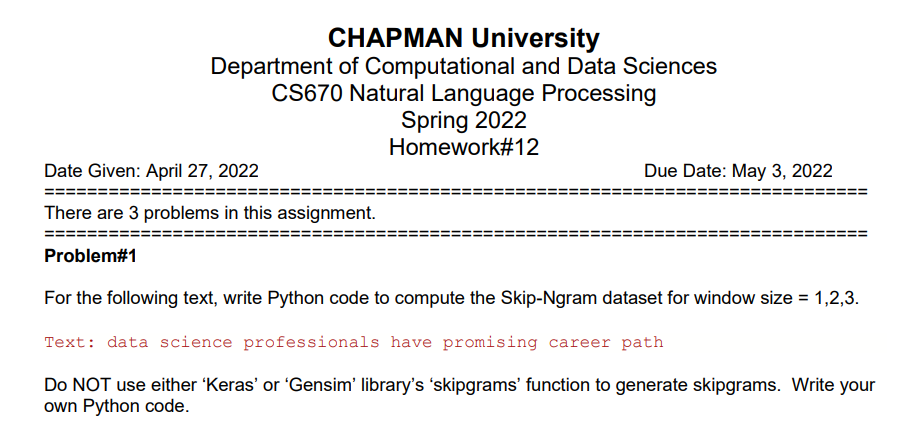

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
corpus =['data science professionals have promising career path']

In [6]:
# tokenize
words=[]
for text in corpus:
  for word in text.split(' '):
    words.append(word)
# words= sorted(set(words))
print(words)
print('Total words:',len(words))

['data', 'science', 'professionals', 'have', 'promising', 'career', 'path']
Total words: 7


In [7]:
# Generate Skip-ngram
def skip_ngram(words,window):
  # print('window size:',window)
  bwd=[]
  for i in range(len(words)):
    for j in range(window+1):

      if i!=j+i and i>=1 and i-j >=0:
        # print(i,j,words[i],words[i-j])
        bwd.append((words[i],words[i-j]))
      if  j >0 and i < len(words)-1 and i+j<len(words):
        # print(i,j,len(words)-1,words[i],words[i+j])
        bwd.append((words[i],words[i+j]))
  return bwd


In [108]:
ws=1
ngrams_list=skip_ngram(words,ws)
sg_df=pd.DataFrame(ngrams_list,columns=['input','label'])
print('Window Size:',ws)
print('Number of Entries:',len(sg_df))
print(sg_df)

Window Size: 1
Number of Entries: 12
            input          label
0            data        science
1         science           data
2         science  professionals
3   professionals        science
4   professionals           have
5            have  professionals
6            have      promising
7       promising           have
8       promising         career
9          career      promising
10         career           path
11           path         career


In [109]:
ws=2
ngrams_list=skip_ngram(words,ws)
sg_df=pd.DataFrame(ngrams_list,columns=['input','label'])
print('Window Size:',ws)
print('Number of Entries:',len(sg_df))
print(sg_df)

Window Size: 2
Number of Entries: 22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals        science
6   professionals           have
7   professionals           data
8   professionals      promising
9            have  professionals
10           have      promising
11           have        science
12           have         career
13      promising           have
14      promising         career
15      promising  professionals
16      promising           path
17         career      promising
18         career           path
19         career           have
20           path         career
21           path      promising


In [110]:
ws=3
ngrams_list=skip_ngram(words,ws)
sg_df=pd.DataFrame(ngrams_list,columns=['input','label'])
print('Window Size:',ws)
print('Number of Entries:',len(sg_df))
print(sg_df)

Window Size: 3
Number of Entries: 30
            input          label
0            data        science
1            data  professionals
2            data           have
3         science           data
4         science  professionals
5         science           have
6         science      promising
7   professionals        science
8   professionals           have
9   professionals           data
10  professionals      promising
11  professionals         career
12           have  professionals
13           have      promising
14           have        science
15           have         career
16           have           data
17           have           path
18      promising           have
19      promising         career
20      promising  professionals
21      promising           path
22      promising        science
23         career      promising
24         career           path
25         career           have
26         career  professionals
27           path         career
28    

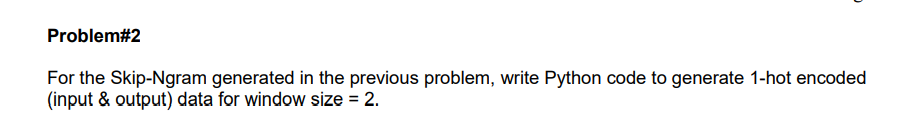

In [128]:
words_copy=words

In [137]:
ws=2 # window size
ngrams_list=skip_ngram(words,ws)
sg_df=pd.DataFrame(ngrams_list,columns=['input','label'])
print('Window Size:',ws)
print('Number of Entries:',len(sg_df))
input_list= list(sg_df['input'])
label_list= list(sg_df['label'])
print(sg_df)

Window Size: 2
Number of Entries: 22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals        science
6   professionals           have
7   professionals           data
8   professionals      promising
9            have  professionals
10           have      promising
11           have        science
12           have         career
13      promising           have
14      promising         career
15      promising  professionals
16      promising           path
17         career      promising
18         career           path
19         career           have
20           path         career
21           path      promising


### One Hot encoding function

In [12]:
words_copy=words
def one_hot(lst,wlist):
  wlist.sort()
  # print(wlist)
  mapping = {}
  for x in range(len(wlist)):
    mapping[wlist[x]] = x
  one_hot_encode = []

  for c in lst:
    arr = list(np.zeros(len(wlist), dtype = int))
    arr[mapping[c]] = 1
    one_hot_encode.append(arr)
  return  one_hot_encode, mapping

### One-Hot Encoding for input list

In [142]:
input_onehot, input_map=one_hot(input_list,words_copy)
print(input_map)
print("Input One-Hot: \n")
np.reshape(input_onehot, (len(input_onehot),len(words)))

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}
Input One-Hot: 



array([[0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]])

### One-Hot Encoding of Label

In [143]:
label_onehot, label_map=one_hot(label_list,words_copy)
print(label_map)
print("Label One-Hot: \n")
np.reshape(label_onehot, (len(label_onehot),len(words)))

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}
Label One-Hot: 



array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])

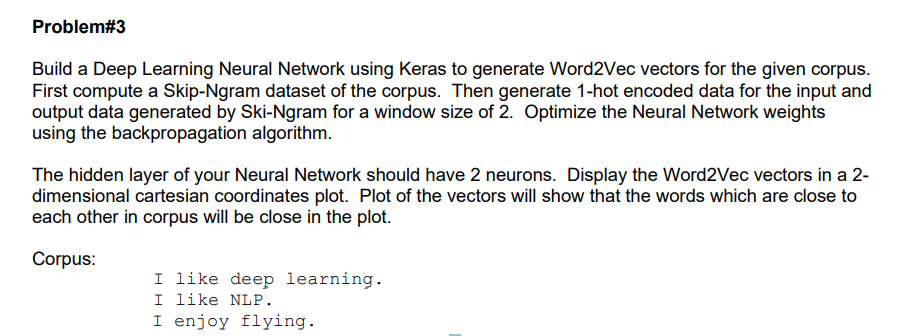

In [8]:
#  create corpus
corpus = ['I like deep learning', 'I like NLP','I enjoy flying']

In [9]:
corpus

['I like deep learning', 'I like NLP', 'I enjoy flying']

In [ ]:
#remove stop words
# There are no stop words except like. but like is probably express an imotion

In [10]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
print('karas version:',keras.__version__)

karas version: 2.8.0


### Tokenize 

In [11]:
# tokenize
words=[]
for text in corpus:
  for word in text.split(' '):
    words.append(word)
# words= sorted(set(words))
print(words)
print('Total words:',len(words))

['I', 'like', 'deep', 'learning', 'I', 'like', 'NLP', 'I', 'enjoy', 'flying']
Total words: 10


### Generate Skip nGram- Using the user defined function 'skip_ngram'

In [12]:
ws=2 # window size
ngrams_list=skip_ngram(words,ws)
sg_df=pd.DataFrame(ngrams_list,columns=['input','label'])
print('Window Size:',ws)
print('Number of Entries:',len(sg_df))
input_list= list(sg_df['input'])
label_list= list(sg_df['label'])
print('Number of Entries:',len(sg_df))
print(sg_df)

Window Size: 2
Number of Entries: 34
Number of Entries: 34
       input     label
0          I      like
1          I      deep
2       like         I
3       like      deep
4       like  learning
5       deep      like
6       deep  learning
7       deep         I
8       deep         I
9   learning      deep
10  learning         I
11  learning      like
12  learning      like
13         I  learning
14         I      like
15         I      deep
16         I       NLP
17      like         I
18      like       NLP
19      like  learning
20      like         I
21       NLP      like
22       NLP         I
23       NLP         I
24       NLP     enjoy
25         I       NLP
26         I     enjoy
27         I      like
28         I    flying
29     enjoy         I
30     enjoy    flying
31     enjoy       NLP
32    flying     enjoy
33    flying         I


In [13]:
# create a distinct list of words
words_copy=words
wl = []
for x in words_copy:
  if x not in wl:
    wl.append(x)

In [14]:
wl

['I', 'like', 'deep', 'learning', 'NLP', 'enjoy', 'flying']

### One-Hot Encoding for inputs and Label features

In [15]:
def one_hot(lst,wlist):
  wlist.sort()
  # print(wlist)
  mapping = {}
  for x in range(len(wlist)):
    mapping[wlist[x]] = x
  one_hot_encode = []

  for c in lst:
    arr = list(np.zeros(len(wlist), dtype = int))
    arr[mapping[c]] = 1
    one_hot_encode.append(arr)
  return  one_hot_encode, mapping

In [16]:
input_onehot, input_map=one_hot(input_list,wl)
print(input_map)
print("Input One-Hot: \n")
np.reshape(input_onehot, (len(input_onehot),len(wl)))

{'I': 0, 'NLP': 1, 'deep': 2, 'enjoy': 3, 'flying': 4, 'learning': 5, 'like': 6}
Input One-Hot: 



array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0,

In [17]:
label_onehot, label_map=one_hot(label_list,wl)
print(label_map)
print("Label One-Hot: \n")
np.reshape(label_onehot, (len(label_onehot),len(wl)))

{'I': 0, 'NLP': 1, 'deep': 2, 'enjoy': 3, 'flying': 4, 'learning': 5, 'like': 6}
Label One-Hot: 



array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1,

### Convert into data frames

In [18]:
X_train = pd.DataFrame(input_onehot, columns =wl)
y_train = pd.DataFrame(label_onehot, columns =wl)

In [19]:
print(X_train.shape,y_train.shape)

(34, 7) (34, 7)


In [20]:
X_train.head()

,I,NLP,deep,enjoy,flying,learning,like
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [21]:
y_train.head()

,I,NLP,deep,enjoy,flying,learning,like
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0


### Neural Network Model

In [22]:
model = Sequential()
model.add(Dense(2, activation='linear',input_dim=X_train.shape[1]))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss= 'categorical_crossentropy',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 16        
                                                                 
 dense_1 (Dense)             (None, 7)                 21        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [23]:
epochs=10000
hist= model.fit(X_train, y_train, epochs=epochs, verbose=0)

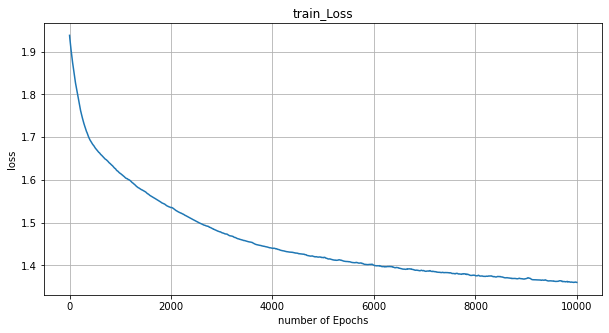

In [24]:
train_loss= hist.history['loss']
xc=range(epochs)
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.xlabel('number of Epochs')
plt.ylabel('loss')
plt.title ('train_Loss')
plt.grid(True)

### Weight and Bias of Neural Network

In [25]:
for layer_num, layer in enumerate(model.layers):
  print("layer#:",layer_num)
  print("weight values:\n")
  print(layer.get_weights()[0])
  print("Bias values:\n")
  print(layer.get_weights()[1])
  print("============================")

layer#: 0
weight values:

[[ 1.1719975   1.1423279 ]
 [ 0.8903084  -2.3683279 ]
 [ 0.0574887  -0.7602996 ]
 [-4.9664545   0.55133784]
 [ 1.3797483  -4.6761637 ]
 [ 0.6027822  -0.28307837]
 [-0.9623785   0.01754426]]
Bias values:

[-0.24810499 -0.3348114 ]
layer#: 1
weight values:

[[-0.65895295 -0.5227958   0.4104451   2.5980558  -0.7333474  -0.14067301
   1.748109  ]
 [-1.5840238   1.9751836   0.3759145  -1.1099149   3.1375258  -0.07811789
  -0.6086519 ]]
Bias values:

[ 0.12260207  0.0319117   0.5700933  -1.4240693  -1.2456341   0.5438163
  0.50436246]


### Extract Weights and Biases of Layer #1

In [34]:
for layer_num, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]
  biases= layer.get_weights()[1]
  break


In [39]:
print ('weights\n',weights)
print ('biases\n',biases)
print ('weights+ biases\n',weights+biases)

weights
 [[ 1.1719975   1.1423279 ]
 [ 0.8903084  -2.3683279 ]
 [ 0.0574887  -0.7602996 ]
 [-4.9664545   0.55133784]
 [ 1.3797483  -4.6761637 ]
 [ 0.6027822  -0.28307837]
 [-0.9623785   0.01754426]]
biases
 [-0.24810499 -0.3348114 ]
weights+ biases
 [[ 0.92389256  0.8075165 ]
 [ 0.6422034  -2.7031393 ]
 [-0.1906163  -1.095111  ]
 [-5.2145596   0.21652645]
 [ 1.1316433  -5.010975  ]
 [ 0.3546772  -0.61788976]
 [-1.2104836  -0.31726712]]


### Generate Word2Vec Vectors

In [40]:
Word2Vec=weights+biases
print(Word2Vec)

[[ 0.92389256  0.8075165 ]
 [ 0.6422034  -2.7031393 ]
 [-0.1906163  -1.095111  ]
 [-5.2145596   0.21652645]
 [ 1.1316433  -5.010975  ]
 [ 0.3546772  -0.61788976]
 [-1.2104836  -0.31726712]]


In [43]:
w2v_df =pd.DataFrame(Word2Vec,columns =['x1','x2'])
w2v_df['word'] =wl


In [44]:
w2v_df

,x1,x2,word
0,0.923893,0.807517,I
1,0.642203,-2.703139,NLP
2,-0.190616,-1.095111,deep
3,-5.214560,0.216526,enjoy
4,1.131643,-5.010975,flying
5,0.354677,-0.617890,learning
6,-1.210484,-0.317267,like


### Display the Word2Vec vectors in a 2-dimensional cartesian coordinates plot.

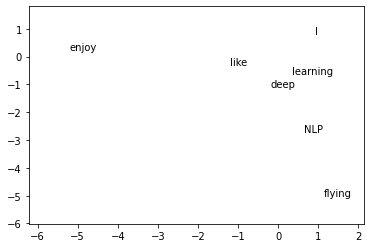

In [50]:
fig, ax= plt.subplots()
for word, x1, x2 in zip(w2v_df['word'],w2v_df['x1'],w2v_df['x2']):
  ax.annotate(word,(x1,x2))
padding=1.0
x_axis_min=np.amin(Word2Vec,axis=0)[0]-padding
y_axis_min=np.amin(Word2Vec,axis=0)[1]-padding
x_axis_max=np.amax(Word2Vec,axis=0)[0]+padding
y_axis_max=np.amax(Word2Vec,axis=0)[1]+padding

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] =(5,4)
plt.show()

In [51]:
corpus

['I like deep learning', 'I like NLP', 'I enjoy flying']

Plot of the vectors show that the words which are close to 
each other in corpus will be close in the plot.